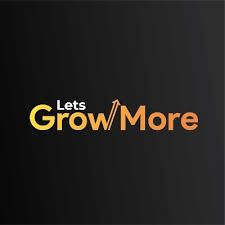

##  `Prediction using Decision Tree Algorithm`
### ` Author :- Kanthuri Venkata Sai Charan`
### `Lets Grow More Virtual Internship Programme(LGMVIP)`
### `Data Science Intern @ Lets Grow More`
### `Intermediate Level Task 2`

***We need to create a Machine learning Model for the given iris data set using `Decision Tree Algorithm` for classification of different types of iris flowers.*** 

#### Importing Basic Libraries
####  Basic Libraries we need for model is `Pandas`,`Numpy`,`Matplotlib`,`Seaborn`,`Sklearn`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV file into data frame using Pandas Library

In [2]:
data= pd.read_csv("C:\\Users\\Dell\\Downloads\\iris.csv")
print('\nDataframe created\n ')


Dataframe created
 


### Understanding the dataset 

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Separating Features and Target Columns
 **Here `SepalLengthCm`,`SepalWidththCm`,`PepalLengthCm`,`PepalWidthCm` Columns comes under Feature_columns and `Species` column as Target Column.**
 ### ***Note :-*** 
 #### ***1. All Feature columns always contain Independent Variables.As, They don't need any other variables information.***
 ####  ***2.  All Target columns always contain Dependent variables .Because, they can only be classified based on independent variables observations.***

In [9]:
feature_cols=['SepalLengthCm','SepalWidththCm','PepalLengthCm','PepalWidthCm']
X = data.iloc[:,1:5]
y= data.loc[:,'Species']

### Training the model 

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

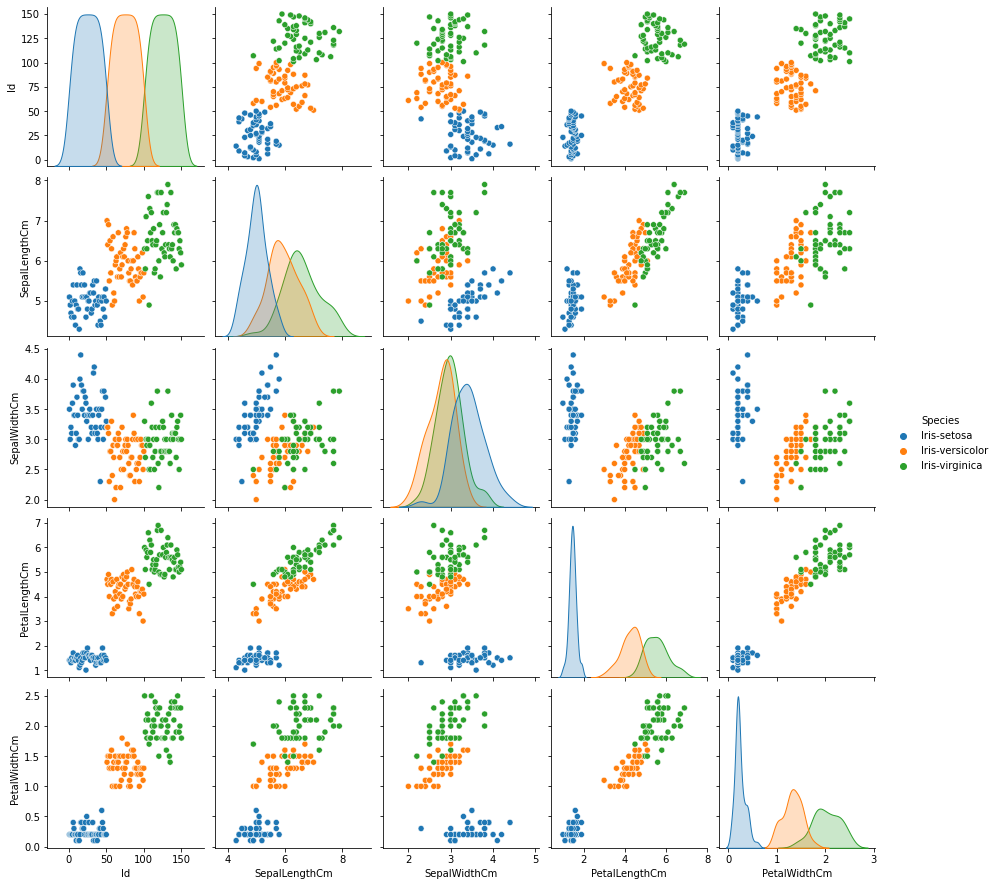

In [11]:
sns.pairplot(data=data,hue='Species')

In [12]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


## Decision Tree 

**Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving `regression` and `classification` problems too.**

**The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).**

**In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.**

<img src='https://static.wixstatic.com/media/2d2ac8_b85bb9c5b0ed4fde9e4734c8d15cf044~mv2.jpg/v1/fill/w_688,h_343,al_c,q_90/2d2ac8_b85bb9c5b0ed4fde9e4734c8d15cf044~mv2.jpg' alt="">

##### **There are two types of Decision Trees**
##### **1. Categorical Variable Decision Tree: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.**
##### **2. Continuous Variable Decision Tree: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.**

### Gini-index 
**The Gini index as a cost function used to evaluate splits in the dataset. It is calculated by subtracting the sum of the squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values.**

**Gini Index works with the categorical target variable “Success” or “Failure”. It performs only Binary splits.**
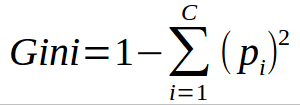

### Importing DecisionTreeClassifier from Sklearn

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Prediction of Test Dataset

In [14]:
y_pred = classifier.predict(X_test)#Accuracy
print(y_pred,sep=' ')

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


### Evaluating the model Accuracy

In [15]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred)*100)

Accuracy Score: 97.77777777777777


### Confusion Matrix
#### A confusion matrix is a technique for summarizing the performance of a classification algorithm. Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset

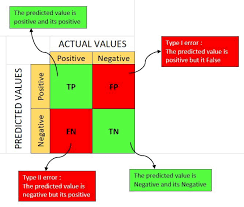

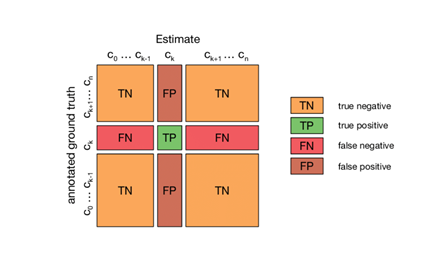

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### Here,As there are 3 classes we got confusion matrix in 3X3 form.We can say, that only 1 error we got from confusion Matrix. Depending on accuracy of the model,the confusion matrix values changes.

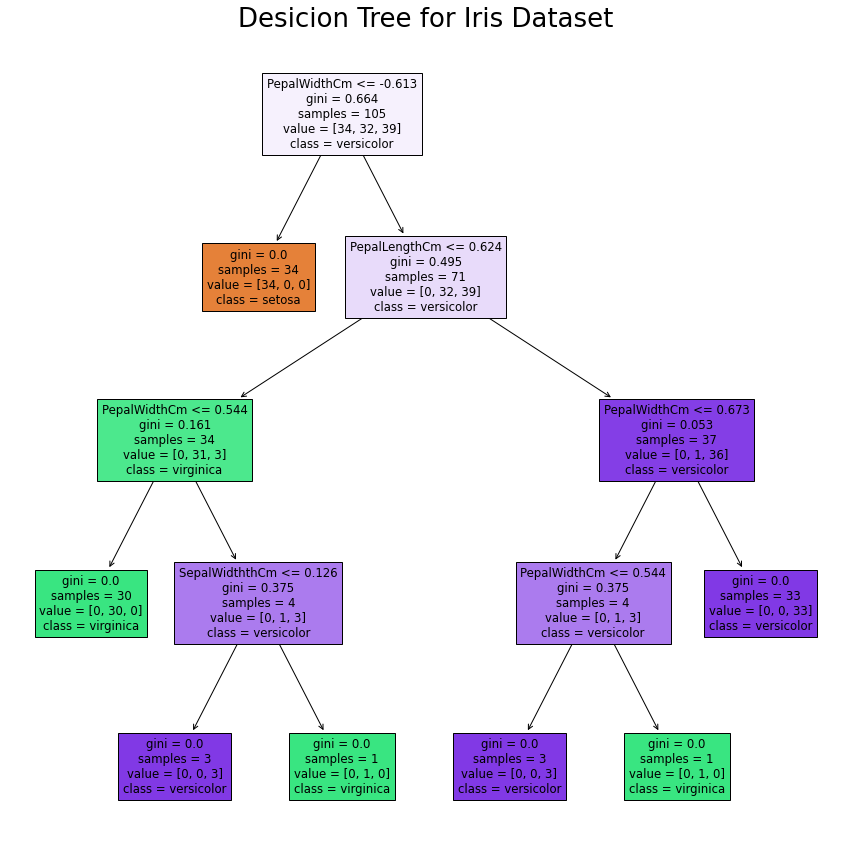

In [17]:
plt.figure(figsize=(15,15))
plot_tree(classifier,filled=True,feature_names=feature_cols,class_names=['setosa','virginica','versicolor'])
plt.title("Desicion Tree for Iris Dataset",size=26)
print()

### `Thanking you`
### ` Author :- Kanthuri Venkata Sai Charan`